# Sentiment Analysis by Manikanta Chunduru Balaji

In [1]:
#Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import regex as re
%matplotlib inline


In [3]:
#Read data from json file from https://t.me/CryptoComOfficial from May 1 to and including May 15, 2021.

In [4]:
data=pd.read_json("result.json")
pd.set_option("display.max_colwidth", -1)

<ipython-input-4-e38c949ec575>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [5]:
data.head(5)

,name,type,id,messages
0,Crypto.com,public_supergroup,1290986109,"{'id': 1903819, 'type': 'message', 'date': '2021-05-01T00:00:12', 'from': None, 'from_id': 'user1650688285', 'text': 'hi'}"
1,Crypto.com,public_supergroup,1290986109,"{'id': 1903842, 'type': 'message', 'date': '2021-05-01T00:01:13', 'from': None, 'from_id': 'user1650688285', 'text': 'do indicators work?'}"
2,Crypto.com,public_supergroup,1290986109,"{'id': 1903855, 'type': 'message', 'date': '2021-05-01T00:01:50', 'from': 'Social Ch4in', 'from_id': 'user484605980', 'text': 'If you trade true gbp for gbp Fiat or vice Versa is there a fee?'}"
3,Crypto.com,public_supergroup,1290986109,"{'id': 1903856, 'type': 'message', 'date': '2021-05-01T00:02:05', 'from': 'Social Ch4in', 'from_id': 'user484605980', 'text': 'And how much is that fee?'}"
4,Crypto.com,public_supergroup,1290986109,"{'id': 1903857, 'type': 'message', 'date': '2021-05-01T00:02:12', 'from': 'Social Ch4in', 'from_id': 'user484605980', 'text': 'If you’re a silver card holder'}"


# Data Preprocessing

In [6]:
data['messages'].apply(pd.Series)

,id,type,date,from,from_id,text,reply_to_message_id,forwarded_from,actor,actor_id,...,message_id,file,thumbnail,media_type,sticker_emoji,contact_information,contact_vcard,mime_type,duration_seconds,via_bot
0,1903819,message,2021-05-01T00:00:12,None,user1650688285,hi,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1903842,message,2021-05-01T00:01:13,None,user1650688285,do indicators work?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1903855,message,2021-05-01T00:01:50,Social Ch4in,user484605980,If you trade true gbp for gbp Fiat or vice Versa is there a fee?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1903856,message,2021-05-01T00:02:05,Social Ch4in,user484605980,And how much is that fee?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1903857,message,2021-05-01T00:02:12,Social Ch4in,user484605980,If you’re a silver card holder,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49431,2042305,message,2021-05-15T23:56:33,F - B,user1260759975,Yea I do,2042299.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49432,2042308,message,2021-05-15T23:57:02,SjSjSj,user527275195,I beleive it will tank.,2042299.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49433,2042312,message,2021-05-15T23:57:16,Doris,user1610830496,Are you worry that too many see that URL is a scam that hurts you?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49434,2042318,message,2021-05-15T23:58:56,SjSjSj,user527275195,Dammit i want some fake giveaways too. Where is my dm.,2042315.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data = pd.concat([data['messages'].apply(pd.Series), data.drop('messages', axis = 1)], axis = 1)

In [8]:
data

,id,type,date,from,from_id,text,reply_to_message_id,forwarded_from,actor,actor_id,...,media_type,sticker_emoji,contact_information,contact_vcard,mime_type,duration_seconds,via_bot,name,type,id
0,1903819,message,2021-05-01T00:00:12,None,user1650688285,hi,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
1,1903842,message,2021-05-01T00:01:13,None,user1650688285,do indicators work?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
2,1903855,message,2021-05-01T00:01:50,Social Ch4in,user484605980,If you trade true gbp for gbp Fiat or vice Versa is there a fee?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
3,1903856,message,2021-05-01T00:02:05,Social Ch4in,user484605980,And how much is that fee?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
4,1903857,message,2021-05-01T00:02:12,Social Ch4in,user484605980,If you’re a silver card holder,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49431,2042305,message,2021-05-15T23:56:33,F - B,user1260759975,Yea I do,2042299.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
49432,2042308,message,2021-05-15T23:57:02,SjSjSj,user527275195,I beleive it will tank.,2042299.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
49433,2042312,message,2021-05-15T23:57:16,Doris,user1610830496,Are you worry that too many see that URL is a scam that hurts you?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
49434,2042318,message,2021-05-15T23:58:56,SjSjSj,user527275195,Dammit i want some fake giveaways too. Where is my dm.,2042315.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109


In [9]:
#Filtered Data that mention either “SHIB” or “DOGE.”
data=data[data['text'].str.contains('SHIB|DOGE.',na=False)]
data.shape

(393, 29)

In [10]:
data

,id,type,date,from,from_id,text,reply_to_message_id,forwarded_from,actor,actor_id,...,media_type,sticker_emoji,contact_information,contact_vcard,mime_type,duration_seconds,via_bot,name,type,id
1820,1909248,message,2021-05-01T16:40:46,Tayfun,user810040917,"If DOGE is more worth than CRO for now, who knows what CRO will do in the future",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
2040,1909811,message,2021-05-01T19:21:28,RAVI Lohana,user1005596482,HOW ABOUT DOGE???,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
5379,1920607,message,2021-05-03T12:10:42,No Doubts,user865363997,DOGE💨💨,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
5834,1921955,message,2021-05-03T16:44:13,None,user1779368108,DOGE coin is up by +16.39%🚀🚀🚀,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
6078,1922592,message,2021-05-03T19:50:58,None,user1665131938,Your did not receive your DOGE from the Supercharger ?,1922571.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49159,2041475,message,2021-05-15T21:04:06,The Youngest Billionaire,user1887936605,"From where to buy SHIB in India, any leads please ?",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
49161,2041482,message,2021-05-15T21:08:02,Neto | Crypto.com,user1395411322,SHIB is listed through the Cryptocom App 🙏,2041475.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
49170,2041512,message,2021-05-15T21:13:01,Hunter Thomas,user1798710656,Binance listed SHIB just this week.,2041475.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109
49255,2041751,message,2021-05-15T22:12:23,𝓸𝓽𝓱𝓶𝓪𝓷𝓮,user1002647340,SHIB ???,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109


# Cleaning the text

In [11]:
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    words = [w for w in text]
    temp = "".join(word for word in words)
    return temp

In [12]:
# Cleaning the text in the text column
# Data stored in Cleaned text column
data['Cleaned text'] = data['text'].apply(clean)
data.head(20)

<ipython-input-12-3429e69f160e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cleaned text'] = data['text'].apply(clean)


,id,type,date,from,from_id,text,reply_to_message_id,forwarded_from,actor,actor_id,...,sticker_emoji,contact_information,contact_vcard,mime_type,duration_seconds,via_bot,name,type,id,Cleaned text
1820,1909248,message,2021-05-01T16:40:46,Tayfun,user810040917,"If DOGE is more worth than CRO for now, who knows what CRO will do in the future",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,If DOGE is more worth than CRO for now who knows what CRO will do in the future
2040,1909811,message,2021-05-01T19:21:28,RAVI Lohana,user1005596482,HOW ABOUT DOGE???,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,HOW ABOUT DOGE
5379,1920607,message,2021-05-03T12:10:42,No Doubts,user865363997,DOGE💨💨,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,DOGE
5834,1921955,message,2021-05-03T16:44:13,None,user1779368108,DOGE coin is up by +16.39%🚀🚀🚀,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,DOGE coin is up by
6078,1922592,message,2021-05-03T19:50:58,None,user1665131938,Your did not receive your DOGE from the Supercharger ?,1922571.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,Your did not receive your DOGE from the Supercharger
6678,1924244,message,2021-05-04T01:43:45,Andrey Sergienko,user751896094,DOGE?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,DOGE
8193,1928718,message,2021-05-04T12:45:03,Elias Hohl,user1593739028,"Invest in a coin with fundamentals. DOGE doesn't have fundamentals but is a meme coin. It is purely random if DOGE will go up further. It might, it might not. (I hope I am not warned for this statement, as it is purely made of facts and doesn't give any opinions / financial advice apart from investing in a coin with fundamentals)",1928667.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,Invest in a coin with fundamentals DOGE doesn t have fundamentals but is a meme coin It is purely random if DOGE will go up further It might it might not I hope I am not warned for this statement as it is purely made of facts and doesn t give any opinions financial advice apart from investing in a coin with fundamentals
8758,1930347,message,2021-05-04T17:23:09,No Doubts,user865363997,"System, network, hatwork , backwork..DOGE IN 4",1930342.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,System network hatwork backwork DOGE IN
8880,1930672,message,2021-05-04T18:45:12,Vinicius Gois,user514686451,How DOGE points work ?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,How DOGE points work
9224,1931694,message,2021-05-04T22:29:12,Ritihk,user1205279833,When is DOGE expected to crash?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,When is DOGE expected to crash


# Tokenization, POS tagging, stopwords removal

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['POS tagged'] = data['Cleaned text'].apply(token_stop_pos)
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mani\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-13-abc2314c6e80>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,id,type,date,from,from_id,text,reply_to_message_id,forwarded_from,actor,actor_id,...,contact_information,contact_vcard,mime_type,duration_seconds,via_bot,name,type,id,Cleaned text,POS tagged
1820,1909248,message,2021-05-01T16:40:46,Tayfun,user810040917,"If DOGE is more worth than CRO for now, who knows what CRO will do in the future",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,If DOGE is more worth than CRO for now who knows what CRO will do in the future,"[(DOGE, n), (worth, a), (CRO, n), (knows, v), (CRO, n), (future, n)]"
2040,1909811,message,2021-05-01T19:21:28,RAVI Lohana,user1005596482,HOW ABOUT DOGE???,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,HOW ABOUT DOGE,"[(DOGE, n)]"
5379,1920607,message,2021-05-03T12:10:42,No Doubts,user865363997,DOGE💨💨,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,DOGE,"[(DOGE, n)]"
5834,1921955,message,2021-05-03T16:44:13,None,user1779368108,DOGE coin is up by +16.39%🚀🚀🚀,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,DOGE coin is up by,"[(DOGE, n), (coin, n)]"
6078,1922592,message,2021-05-03T19:50:58,None,user1665131938,Your did not receive your DOGE from the Supercharger ?,1922571.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,Your did not receive your DOGE from the Supercharger,"[(receive, v), (DOGE, n), (Supercharger, n)]"


# Lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

<ipython-input-14-30d1ef40914c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Lemma'] = data['POS tagged'].apply(lemmatize)


,id,type,date,from,from_id,text,reply_to_message_id,forwarded_from,actor,actor_id,...,contact_vcard,mime_type,duration_seconds,via_bot,name,type,id,Cleaned text,POS tagged,Lemma
1820,1909248,message,2021-05-01T16:40:46,Tayfun,user810040917,"If DOGE is more worth than CRO for now, who knows what CRO will do in the future",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,If DOGE is more worth than CRO for now who knows what CRO will do in the future,"[(DOGE, n), (worth, a), (CRO, n), (knows, v), (CRO, n), (future, n)]",DOGE worth CRO know CRO future
2040,1909811,message,2021-05-01T19:21:28,RAVI Lohana,user1005596482,HOW ABOUT DOGE???,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,HOW ABOUT DOGE,"[(DOGE, n)]",DOGE
5379,1920607,message,2021-05-03T12:10:42,No Doubts,user865363997,DOGE💨💨,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,DOGE,"[(DOGE, n)]",DOGE
5834,1921955,message,2021-05-03T16:44:13,None,user1779368108,DOGE coin is up by +16.39%🚀🚀🚀,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,DOGE coin is up by,"[(DOGE, n), (coin, n)]",DOGE coin
6078,1922592,message,2021-05-03T19:50:58,None,user1665131938,Your did not receive your DOGE from the Supercharger ?,1922571.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Crypto.com,public_supergroup,1290986109,Your did not receive your DOGE from the Supercharger,"[(receive, v), (DOGE, n), (Supercharger, n)]",receive DOGE Supercharger


# Sentiment Analysis using Textblob

In [15]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the tex
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [16]:
fin_data = pd.DataFrame(data[['text','Lemma','date']])

In [17]:
fin_data['Polarity'] = fin_data['text'].apply(getPolarity) 
fin_data['Subjectivity'] = fin_data['text'].apply(getSubjectivity)
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head(40)

,text,Lemma,date,Polarity,Subjectivity,Analysis
1820,"If DOGE is more worth than CRO for now, who knows what CRO will do in the future",DOGE worth CRO know CRO future,2021-05-01T16:40:46,0.266667,0.241667,Positive
2040,HOW ABOUT DOGE???,DOGE,2021-05-01T19:21:28,0.000000,0.000000,Neutral
5379,DOGE💨💨,DOGE,2021-05-03T12:10:42,0.000000,0.000000,Neutral
5834,DOGE coin is up by +16.39%🚀🚀🚀,DOGE coin,2021-05-03T16:44:13,0.000000,0.000000,Neutral
6078,Your did not receive your DOGE from the Supercharger ?,receive DOGE Supercharger,2021-05-03T19:50:58,0.000000,0.000000,Neutral
6678,DOGE?,DOGE,2021-05-04T01:43:45,0.000000,0.000000,Neutral
8193,"Invest in a coin with fundamentals. DOGE doesn't have fundamentals but is a meme coin. It is purely random if DOGE will go up further. It might, it might not. (I hope I am not warned for this statement, as it is purely made of facts and doesn't give any opinions / financial advice apart from investing in a coin with fundamentals)",Invest coin fundamental DOGE fundamental meme coin purely random DOGE go might might hope warn statement purely make fact give opinion financial advice apart invest coin fundamental,2021-05-04T12:45:03,-0.071429,0.375000,Negative
8758,"System, network, hatwork , backwork..DOGE IN 4",System network hatwork backwork DOGE,2021-05-04T17:23:09,0.000000,0.000000,Neutral
8880,How DOGE points work ?,DOGE point work,2021-05-04T18:45:12,0.000000,0.000000,Neutral
9224,When is DOGE expected to crash?,DOGE expect crash,2021-05-04T22:29:12,-0.100000,0.400000,Negative


In [18]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Neutral     260
Positive    88 
Negative    45 
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x19f69eced60>,
 [Text(-0.5346999038858724, 0.961299127631165, 'Neutral'),
  Text(0.16208284201971038, -1.0879931765975437, 'Positive'),
  Text(1.2635916676014092, -0.4752221560157833, 'Negative')],
 [Text(-0.29165449302865765, 0.5243449787079081, '66.2%'),
  Text(0.088408822919842, -0.5934508235986601, '22.4%'),
  Text(0.7955947536749614, -0.29921395008401175, '11.5%')])

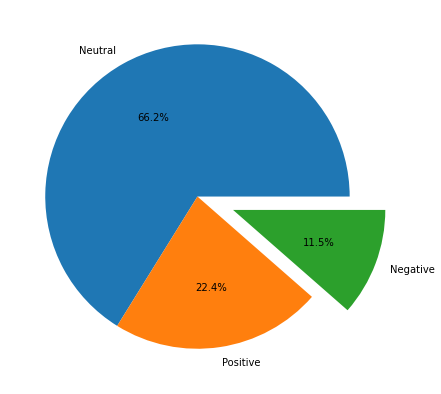

In [19]:
tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


In [20]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [21]:
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [22]:
fin_data.iplot(kind='bar',x='date',y='text')

In [23]:
messages_perday=fin_data.groupby('date')['text'].sum()
messages_perday.iplot(kind='bar',title='Number of messages per day')

In [24]:
sentiment_perday=fin_data.groupby('date')['Analysis']
sentiment_perday